In [1]:
%pylab inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn import mixture
from scipy.stats import norm

Populating the interactive namespace from numpy and matplotlib


In [32]:
# set simulation parameters
mean1, std1, w1 = 0,5,0.5
mean2, std2, w2 = 17,33,1-w1


# simulate constituents
n_samples = 100000
np.random.seed(2021)
gauss_sample_1 = np.random.normal(loc = mean1,scale = std1,size = n_samples)
gauss_sample_2 = np.random.normal(loc = mean2,scale = std2,size = n_samples)
binomial = np.random.binomial(n=1, p=w1, size = n_samples)

# simulate gaussian mixture
mutlimodal_samples = (gauss_sample_1 * binomial + gauss_sample_2 * (1-binomial)).reshape(-1,1)

# define and fit the mixture model
gmix = mixture.GaussianMixture(n_components = 2, covariance_type = "full")
fitted = gmix.fit(mutlimodal_samples)
# Plot component pdfs and a joint pdf
ls = np.linspace(-50, 100, 1000)
new_norm1 = norm.pdf(ls, fitted.means_[0][0], np.sqrt(fitted.covariances_[0][0][0]))
new_norm2 = norm.pdf(ls, fitted.means_[1][0], np.sqrt(fitted.covariances_[1][0][0]))
multi_pdf = w1*new_norm1 + (1-w1)*new_norm2


In [ ]:
n_samples.

100000

In [33]:
new_norm1 = norm.pdf(ls, fitted.means_[0][0], np.sqrt(fitted.covariances_[0][0][0]))
new_norm2 = norm.pdf(ls, fitted.means_[1][0], np.sqrt(fitted.covariances_[1][0][0]))
multi_pdf = w1*new_norm1 + (1-w1)*new_norm2


In [35]:
means = gmix.means_
weights = gmix.weights_
# Compute the global mean by weighted averaging
global_mean = np.average(means, weights=weights, axis=0)
global_median = np.median(means)

In [36]:
palette1=sn.color_palette("blend:#7AB,#EDA")
palette2=sn.color_palette("viridis")

In [76]:
mean3, std3, = 12, 0.8
prior=norm.pdf(ls, mean2,std3 )
li=multi_pdf*norm.pdf(ls, mean3,std3 )

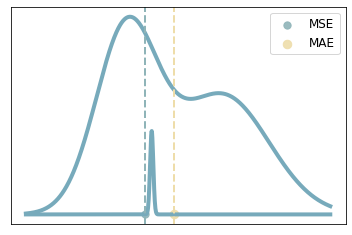

In [77]:
plt.plot(ls, multi_pdf, linewidth=4, color=palette1[0])
plt.plot(ls, multi_pdf, linewidth=4, color=palette1[0])
plt.scatter(global_mean,0, label='MSE', color=palette1[1], s=53,  alpha=0.9)
plt.scatter(global_median ,0, label='MAE', color=palette1[-1], s=73,alpha=0.9)
plt.axvline(global_mean, linewidth=2, color=palette1[1], ls='--')
plt.axvline(global_median, linewidth=2, color=palette1[-1], ls='--')
plt.legend(loc = 'best',fontsize='large')
fig = plt.gcf()
ax = plt.gca()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
#fig.savefig('../figures/exemple_distribution_light.pdf')

In [14]:
prior.shape

(100000,)

In [15]:
ls.shape

(1000,)